In [ ]:
!wget https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip

--2025-03-07 23:53:55--  https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 96.7.158.17, 2600:1409:9800:1a82::317f, 2600:1409:9800:1a81::317f
Connecting to download.microsoft.com (download.microsoft.com)|96.7.158.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   151MB/s    in 5.2s    

2025-03-07 23:54:00 (152 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [ ]:
!unzip kagglecatsanddogs_5340.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflatin

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import tqdm
import random
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')


In [ ]:
input_path = []
label = []

for class_name in os.listdir("PetImages"):
    for path in os.listdir("PetImages/"+class_name):
        if class_name == 'Cat':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join("PetImages", class_name, path))
print(input_path[0], label[0])

PetImages/Dog/6697.jpg 1


In [ ]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

images  label
0   PetImages/Dog/7370.jpg      1
1   PetImages/Dog/4593.jpg      1
2   PetImages/Dog/7813.jpg      1
3  PetImages/Cat/11231.jpg      0
4   PetImages/Cat/5879.jpg      0

In [ ]:
for i in df['images']:
    if '.jpg' not in i:
        print(i)

PetImages/Cat/Thumbs.db
PetImages/Dog/Thumbs.db


In [ ]:
import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l

['PetImages/Cat/Thumbs.db',
 'PetImages/Cat/666.jpg',
 'PetImages/Dog/11702.jpg',
 'PetImages/Dog/Thumbs.db']

In [ ]:
# delete db files
df = df[df['images']!='PetImages/Dog/Thumbs.db']
df = df[df['images']!='PetImages/Cat/Thumbs.db']
df = df[df['images']!='PetImages/Cat/666.jpg']
df = df[df['images']!='PetImages/Dog/11702.jpg']
len(df)

24998

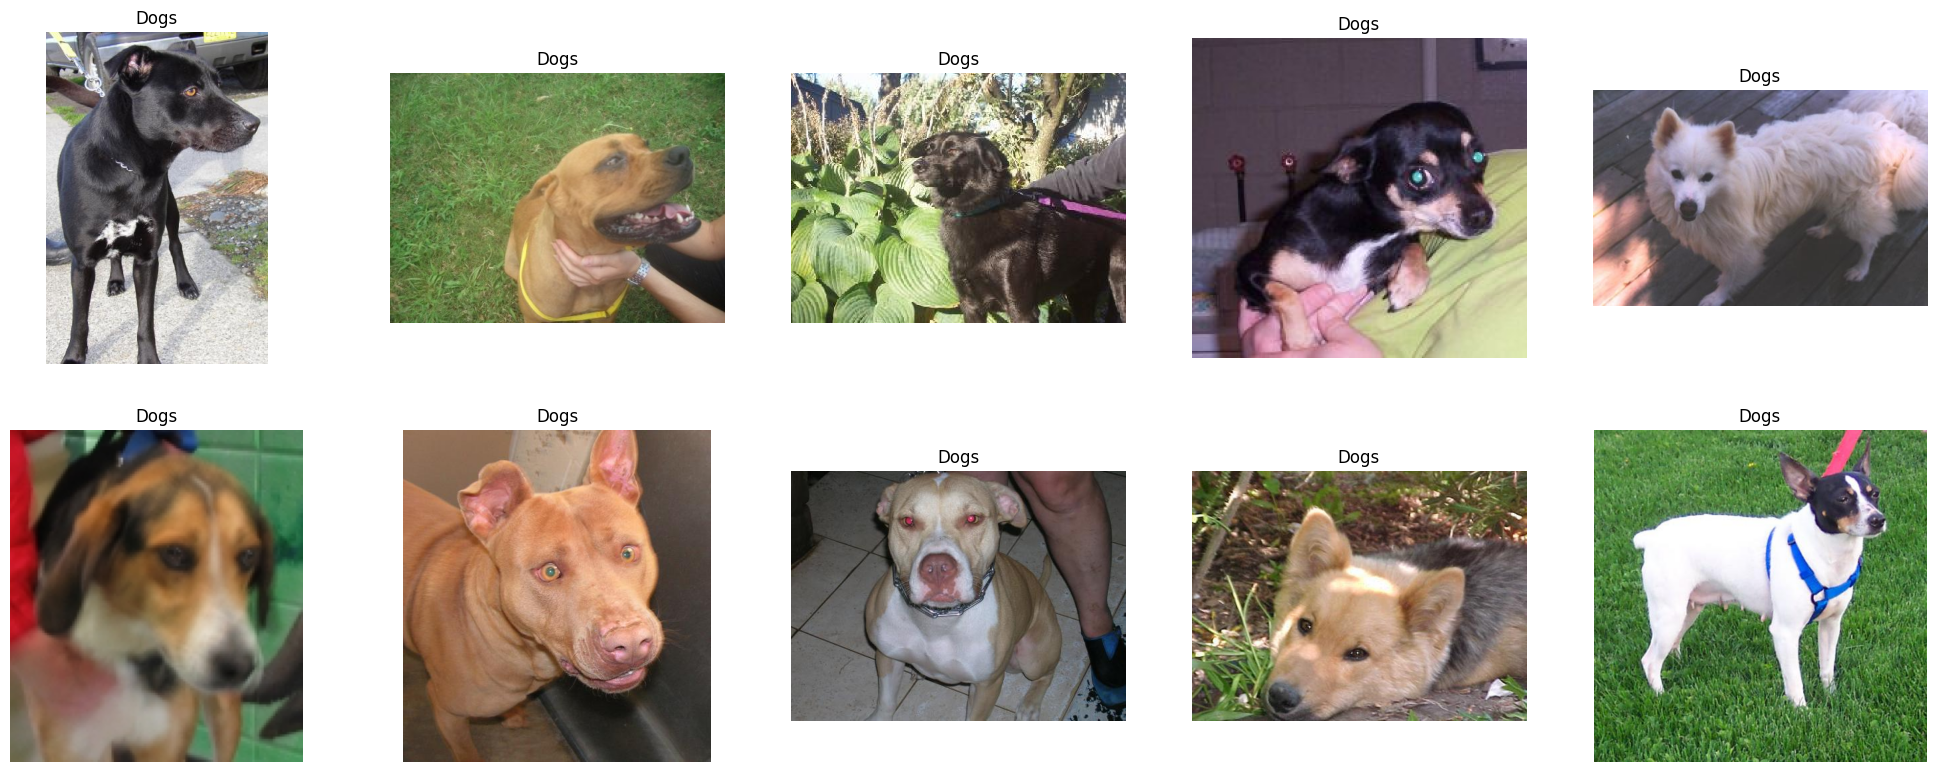

In [ ]:
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+10]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dogs')
    plt.axis('off')

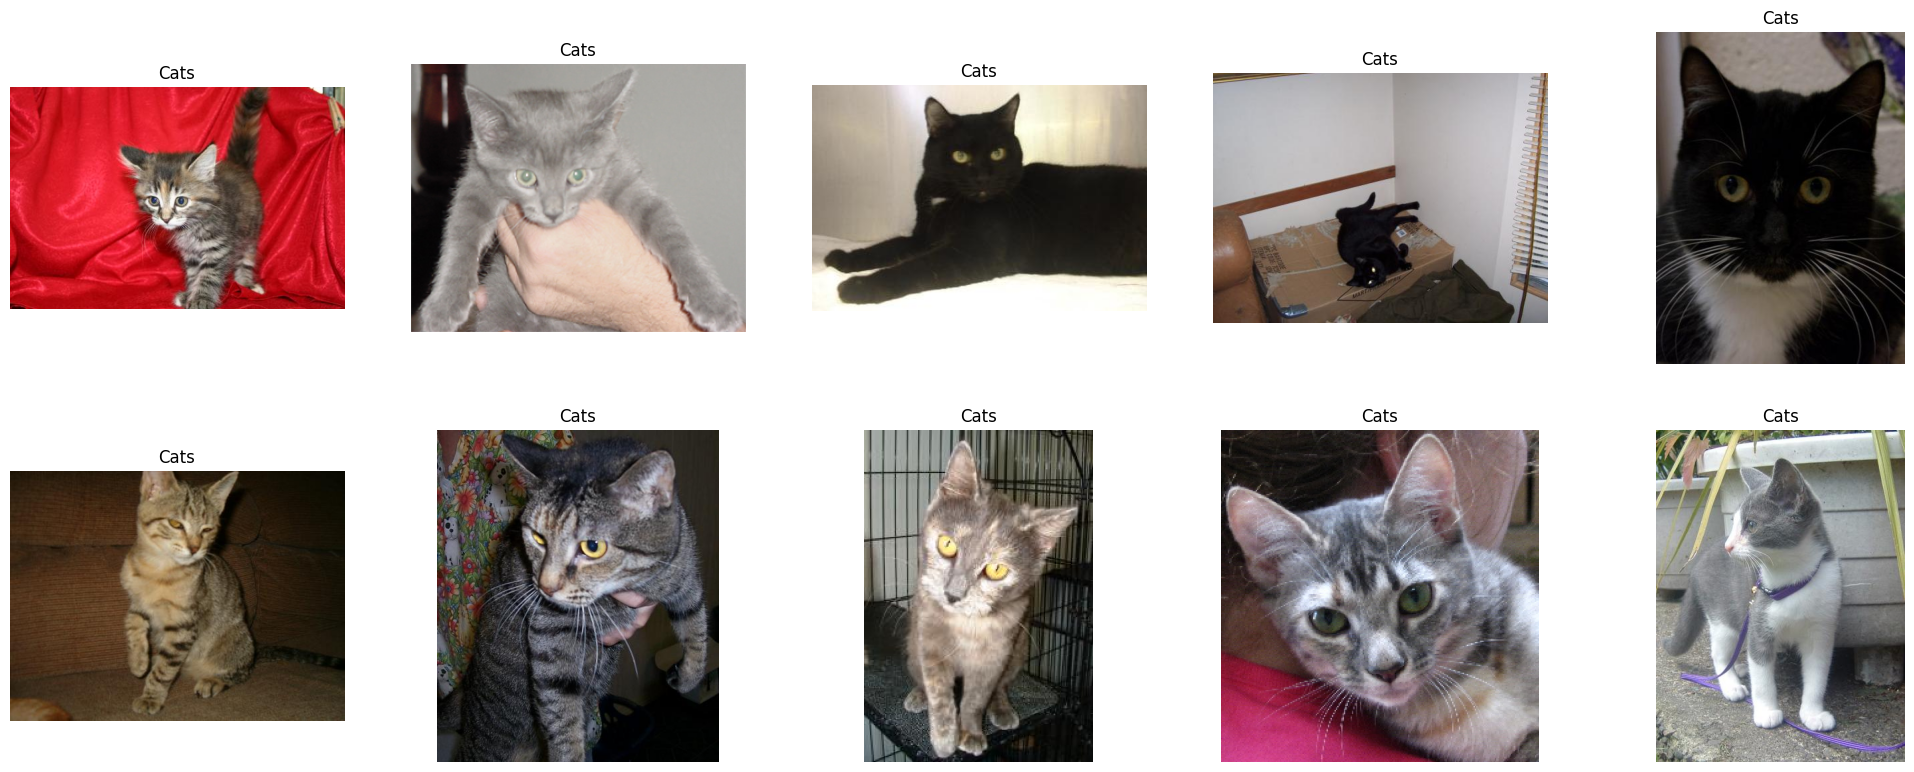

In [ ]:
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+10]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Cats')
    plt.axis('off')

In [ ]:
df['label'] = df['label'].astype('str')
df.head()

images label
0   PetImages/Dog/7370.jpg     1
1   PetImages/Dog/4593.jpg     1
2   PetImages/Dog/7813.jpg     1
3  PetImages/Cat/11231.jpg     0
4   PetImages/Cat/5879.jpg     0

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)


Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [ ]:

from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
                    MaxPool2D((2,2)),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')

                    ])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,447,137 (24.59 MB)

 Trainable params: 6,447,137 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 119s 3s/step - accuracy: 0.5086 - loss: 0.8817 - val_accuracy: 0.5914 - val_loss: 0.6867
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 102s 3s/step - accuracy: 0.5832 - loss: 0.6744 - val_accuracy: 0.6318 - val_loss: 0.6335
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 103s 3s/step - accuracy: 0.6660 - loss: 0.6100 - val_accuracy: 0.6974 - val_loss: 0.5788
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - accuracy: 0.7042 - loss: 0.5732 - val_accuracy: 0.7256 - val_loss: 0.5496
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 103s 3s/step - accuracy: 0.7002 - loss: 0.5717 - val_accuracy: 0.7242 - val_loss: 0.5437
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 103s 3s/step - accuracy: 0.7154 - loss: 0.5498 - val_accuracy: 0.7484 - val_loss: 0.5197
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 103s 3s/step - accuracy: 0.7343 - loss: 0.5320 - val_accuracy: 0.7378 - val_loss: 0.5213
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 102s 3s/step - accuracy: 0.7499 - loss: 0.5139 - val_accuracy: 0.7590 - v

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [ ]:
image_path = "dog3.jpg"
img = load_img(image_path, target_size=(128, 128))
img = np.array(img)
img = img / 255.0
img = img.reshape(1, 128, 128, 3)
pred = model.predict(img)
if pred[0] > 0.5:
    label = 'Dog'
else:
    label = 'Cat'
print(label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Dog


# trying pretrained models

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128,128,3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 188s 4s/step - accuracy: 0.6692 - loss: 0.6116 - val_accuracy: 0.8476 - val_loss: 0.3340
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 115s 3s/step - accuracy: 0.8253 - loss: 0.3807 - val_accuracy: 0.8688 - val_loss: 0.2990
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 116s 3s/step - accuracy: 0.8458 - loss: 0.3474 - val_accuracy: 0.8788 - val_loss: 0.2839
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 116s 3s/step - accuracy: 0.8582 - loss: 0.3272 - val_accuracy: 0.8798 - val_loss: 0.2845
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 116s 3s/step - accuracy: 0.8556 - loss: 0.3255 - val_accuracy: 0.8874 - val_loss: 0.2704
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.8608 - loss: 0.3126 - val_accuracy: 0.8840 - val_loss: 0.2709
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 116s 3s/step - accuracy: 0.8664 - loss: 0.3070 - val_accuracy: 0.8928 - val_loss: 0.2574
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 116s 3s/step - accurac